## 1D example

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
starting_points = np.array([0, 1, 2, 3, 5, 8])

In [133]:
def change_of_possition(array):
    average = np.mean(array)
    speed = 0.05 #speed of change
    #changed = [c + speed*abs(average - c)*(average - c) + 3*speed*abs(average - c)*random.uniform(-0.1,0.1) for c in array] #noise
    changed = [c + speed*abs(average - c)*(average - c) for c in array]
    return changed, average

In [134]:
def dynamic_1D(start, time):
    means = []
    character_change_over_time = np.zeros((6, time))
    character_change_over_time[:, 0] = np.reshape(start, (6,))
    current = start

    for i in range(1, time):
        current, avg = change_of_possition(current)
        means.append(avg)
        character_change_over_time[:, i] = np.reshape(current, (6,))

    return np.arange(time), character_change_over_time, means

In [135]:
%%capture
time, change, means = dynamic_1D(starting_points, 20)

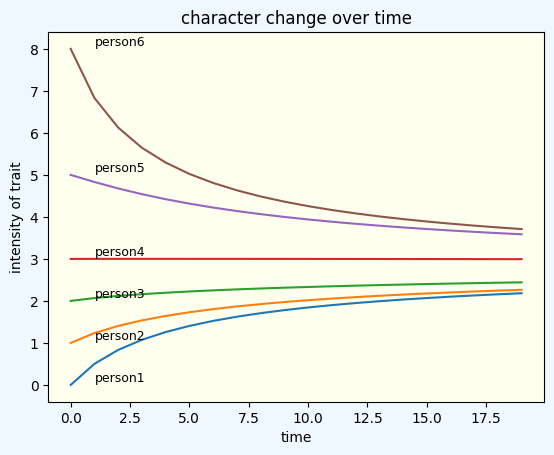

In [130]:
fig, ax = plt.subplots()
for i in range(6):
    scatter = ax.plot(time, change[i])
fig.patch.set_facecolor('aliceblue')
ax.set_facecolor('ivory')
plt.title("character change over time")
plt.xlabel("time")
plt.ylabel("intensity of characteristic")
for i, txt in enumerate(['person1', 'person2', 'person3', 'person4', 'person5', 'person6']):
    ax.text(1, starting_points[i], txt, fontsize=9, ha='left', va='bottom')
plt.show()

In [138]:
means.insert(0, np.mean(starting_points))

Text(0.5, 0, 'time')

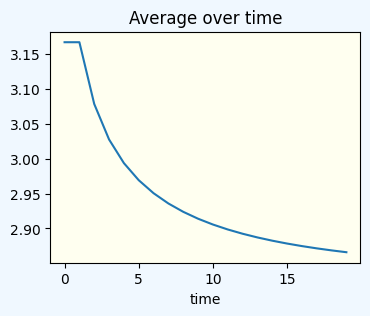

In [144]:
fig, ax = plt.subplots(figsize=(4, 3))
scatter = ax.plot(time, means)
fig.patch.set_facecolor('aliceblue')
ax.set_facecolor('ivory')
plt.title("Average over time")
plt.xlabel("time")

## 2D example


In [93]:
starting_points_x = np.array([-1, 1, 1, 4, 1, -2])
starting_points_y = np.array([-1, -2, 1, 5, 5, 1])

In [159]:
#%%capture
time, change_x, means_x = dynamic_1D(starting_points_x, 100)
time, change_y, means_y = dynamic_1D(starting_points_y, 100)

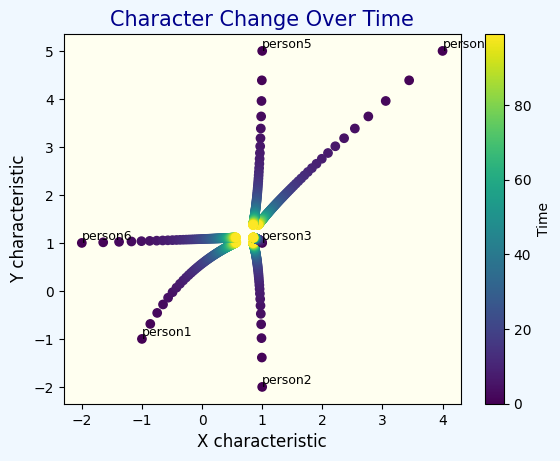

In [160]:
fig, ax = plt.subplots()
for i in range(6):
    scatter = ax.scatter(change_x[i], change_y[i], c=time, cmap='viridis')

fig.patch.set_facecolor('aliceblue')
ax.set_facecolor('ivory')
plt.colorbar(scatter, label='Time')
ax.set_title('Character Change Over Time', fontsize=15, color='darkblue')
ax.set_xlabel('X characteristic', fontsize=12)
ax.set_ylabel('Y characteristic', fontsize=12)
for i, txt in enumerate(['person1', 'person2', 'person3', 'person4', 'person5', 'person6']):
    ax.text(starting_points_x[i], starting_points_y[i], txt, fontsize=9, ha='left', va='bottom')

plt.show()

In [162]:
means_x.insert(0, np.mean(starting_points_x))
means_y.insert(0, np.mean(starting_points_y))

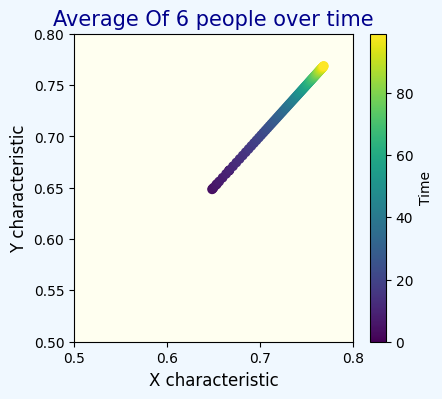

In [163]:
fig, ax = plt.subplots(figsize = (4.5,4))
scatter = ax.scatter(means_x, means_x, c=time, cmap='viridis')
fig.patch.set_facecolor('aliceblue')
ax.set_facecolor('ivory')
plt.colorbar(scatter, label='Time')
ax.set_title('Average Of 6 people over time', fontsize=15, color='darkblue')
ax.set_xlabel('X characteristic', fontsize=12)
ax.set_ylabel('Y characteristic', fontsize=12)
ax.set_xlim([0.5, 0.8])
ax.set_ylim([0.5, 0.8])
plt.show()